In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator#bechler(32*32)halinde resim cekmeye yarar
import matplotlib.image as mpimg
!wget 'https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py'

--2022-03-07 21:34:46--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.2’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-03-07 21:34:46 (88.3 MB/s) - ‘helper_functions.py.2’ saved [10246/10246]



In [ ]:
from helper_functions import unzip_data
from helper_functions import plot_loss_curves

In [ ]:
unzip_data('/content/archive.zip')

In [ ]:
#no-path></content/brain_tumor_dataset/no
#yes_path>>/content/brain_tumor_dataset/yes

In [ ]:
image=mpimg.imread('/content/brain_tumor_dataset/no/17 no.jpg')

In [ ]:
image.shape

(231, 218, 3)

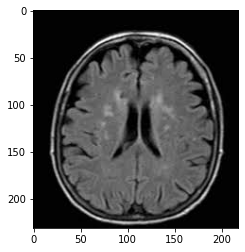

In [ ]:
plt.imshow(image)

In [ ]:
image_yes=mpimg.imread('/content/yes/Y102.jpg')

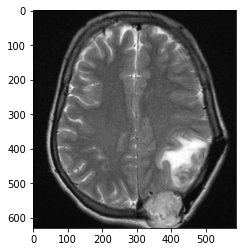

In [ ]:
plt.imshow(image_yes)

In [ ]:
image_yes.max()

255

In [ ]:
data_generator=ImageDataGenerator(rescale=1./255,
                                  validation_split=0.2)#0-255 pixel araligini 0-1 araligina cektik



In [ ]:
train_data=data_generator.flow_from_directory('/content/brain_tumor_dataset',
                                              target_size=(224,224),
                                              class_mode='binary',
                                              seed=1,
                                              subset='training'
                                              )

test_data=data_generator.flow_from_directory('/content/brain_tumor_dataset',
                                             target_size=(224,224),
                                             class_mode='binary',
                                             subset='validation',
                                             seed=1 
                                             )

Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#MODEl

In [ ]:

model_0= tf.keras.Sequential([
                              tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3),activation='relu'),
                              tf.keras.layers.MaxPool2D(pool_size=(3,3)),
                              tf.keras.layers.Conv2D(filters = 32 , kernel_size = (3,3), activation="relu"),
                              tf.keras.layers.MaxPooling2D(pool_size = (3,3)),
                              tf.keras.layers.Conv2D(filters = 32 , kernel_size = (3,3), activation="relu"),
                              tf.keras.layers.MaxPooling2D(pool_size = (3,3)),
                              tf.keras.layers.Flatten(),
                              tf.keras.layers.Dense(128,activation='relu'),
                             # tf.keras.layers.Dropout(0.01),
                              tf.keras.layers.Dense(1,activation='sigmoid')



])


In [ ]:
model_0.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy')

In [ ]:
history_0=model_0.fit(
    train_data,
    epochs=12,
    validation_data=test_data
)

Epoch 1/12
7/7 [==============================] - 1s 159ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.8229 - val_accuracy: 0.8600
Epoch 2/12
7/7 [==============================] - 1s 149ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.8296 - val_accuracy: 0.8600
Epoch 3/12
7/7 [==============================] - 1s 134ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.8450 - val_accuracy: 0.8600
Epoch 4/12
7/7 [==============================] - 1s 130ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.8493 - val_accuracy: 0.8600
Epoch 5/12
7/7 [==============================] - 1s 130ms/step - loss: 9.9999e-04 - accuracy: 1.0000 - val_loss: 0.8630 - val_accuracy: 0.8600
Epoch 6/12
7/7 [==============================] - 1s 139ms/step - loss: 9.3107e-04 - accuracy: 1.0000 - val_loss: 0.8709 - val_accuracy: 0.8600
Epoch 7/12
7/7 [==============================] - 1s 130ms/step - loss: 8.9176e-04 - accuracy: 1.0000 - val_loss: 0.8761 - val_accuracy: 0.8400
Epoch 8/

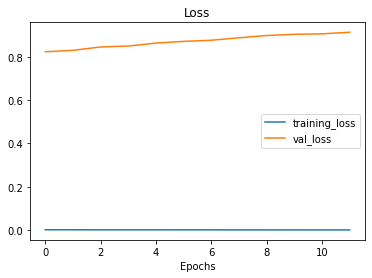

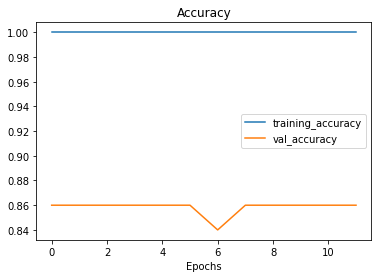

In [ ]:
plot_loss_curves(history_0)